In [1]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
np.random.seed(1000)

Using TensorFlow backend.


In [48]:
model = Sequential()

In [49]:
# 1st Convolutional Layer
model.add(Conv2D(96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding= 'valid', activation = 'relu'))

In [50]:
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

In [51]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [52]:
# 2nd Convolutional Layer
model.add(Conv2D(256, kernel_size=(11,11), strides=(1,1), padding='valid', activation = 'relu'))

In [53]:
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

In [54]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [55]:
# 3rd Convolutional Layer
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))

In [56]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [57]:
# 4th Convolutional Layer
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))

In [58]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [59]:
# 5th Convolutional Layer
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'))

In [60]:
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

In [61]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [62]:
# Passing it to a Fully Connected layer
model.add(Flatten())

In [63]:
# 1st Fully Connected Layer
model.add(Dense(4096, activation = 'relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

In [64]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [65]:
# 2nd Fully Connected Layer
model.add(Dense(4096, activation = 'relu'))
# Add Dropout
model.add(Dropout(0.4))

In [66]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [67]:
# 3rd Fully Connected Layer
model.add(Dense(1000, activation = 'relu'))
# Add Dropout
model.add(Dropout(0.4))

In [68]:
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [69]:
# Output Layer
model.add(Dense(3, activation = 'softmax'))

In [70]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
# Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/seg_train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/seg_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7057 images belonging to 3 classes.
Found 1509 images belonging to 3 classes.


In [72]:
model.fit_generator(training_set,
                    steps_per_epoch = 850,
                    epochs = 10,
                    validation_data = test_set,
                    validation_steps = 1500)

Epoch 1/10
850/850 [==============================] - 4329s 5s/step - loss: 0.6180 - acc: 0.7454 - val_loss: 2.1891 - val_acc: 0.4726
Epoch 2/10
850/850 [==============================] - 4422s 5s/step - loss: 0.4242 - acc: 0.8293 - val_loss: 1.2956 - val_acc: 0.6309
Epoch 3/10
850/850 [==============================] - 4504s 5s/step - loss: 0.3723 - acc: 0.8544 - val_loss: 0.6195 - val_acc: 0.7530
Epoch 4/10
850/850 [==============================] - 4513s 5s/step - loss: 0.3243 - acc: 0.8737 - val_loss: 0.2196 - val_acc: 0.9298
Epoch 5/10
850/850 [==============================] - 4552s 5s/step - loss: 0.2960 - acc: 0.8889 - val_loss: 0.9614 - val_acc: 0.7526
Epoch 6/10
850/850 [==============================] - 4552s 5s/step - loss: 0.2724 - acc: 0.8989 - val_loss: 0.9781 - val_acc: 0.7781
Epoch 7/10
850/850 [==============================] - 4515s 5s/step - loss: 0.2521 - acc: 0.9059 - val_loss: 0.2132 - val_acc: 0.9313
Epoch 8/10
850/850 [==============================] - 4551s 5s

In [5]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loss = [2.1891, 1.2956, 0.6195, 0.2196, 0.9614, 0.9781, 0.2132, 0.2544, 0.2727, 0.4718]
accuracies = [0.4726, 0.6309, 0.7530, 0.9298, 0.7526, 0.7781, 0.9313, 0.9271, 0.8829, 0.8525]

Text(0.5, 1.0, 'Loss Plot (Alex)')

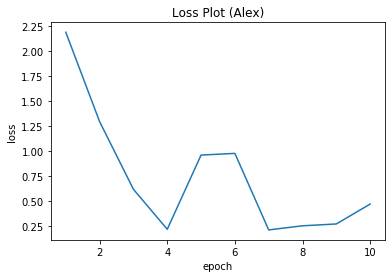

In [6]:
plt.plot(epoch, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Plot (Alex)')

Text(0.5, 1.0, 'Accuracies Plot (Alex)')

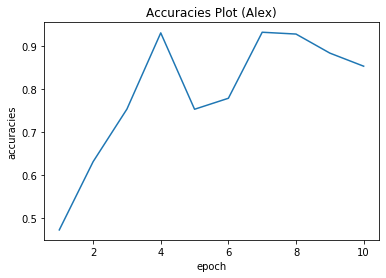

In [3]:
plt.plot(epoch, accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('Accuracies Plot (Alex)')